In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn
import pandas as pd
data = pd.read_csv('datos.csv')
data

,x_1,x_2,y
0,-1.851357e+14,3.565394e+13,0
1,5.715585e+14,-8.484241e+13,1
2,5.175931e+14,-1.231538e+14,1
3,5.966117e+14,-1.778714e+14,1
4,4.207345e+14,-1.175593e+14,1
...,...,...,...
16379,7.025930e+14,-1.572575e+14,0
16380,-8.740727e+13,7.636715e+13,0
16381,4.867707e+14,-1.507269e+14,1
16382,6.819048e+14,-1.245187e+14,1


In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


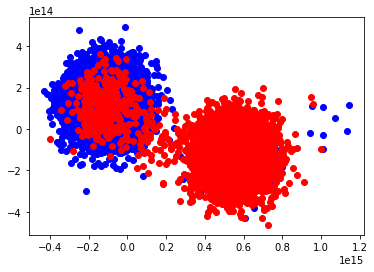

In [3]:
from sklearn.model_selection import train_test_split

X = data.values[:,:2]
y = data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

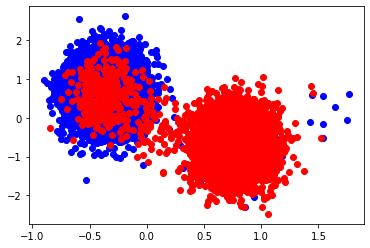

In [6]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler(quantile_range=(25,60)).fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

C:\Users\ASUS\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\ASUS\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Score for AdaBoost Classifier is: 0.9542310821806347
Score for Decision Tree Classifier is: 0.9542310821806347
Score for Gradient Boost Classifier is: 0.9532139951179821
Score for Logistic Regression is: 0.9542310821806347
Score for Random Forest Classifier is: 0.9532139951179821
Score for Support Vector Classifier is: 0.9536208299430431
Score for XGBoost Classifier is: 0.953417
Score for Gaussian Naive Bayes is: 0.9538242473555736


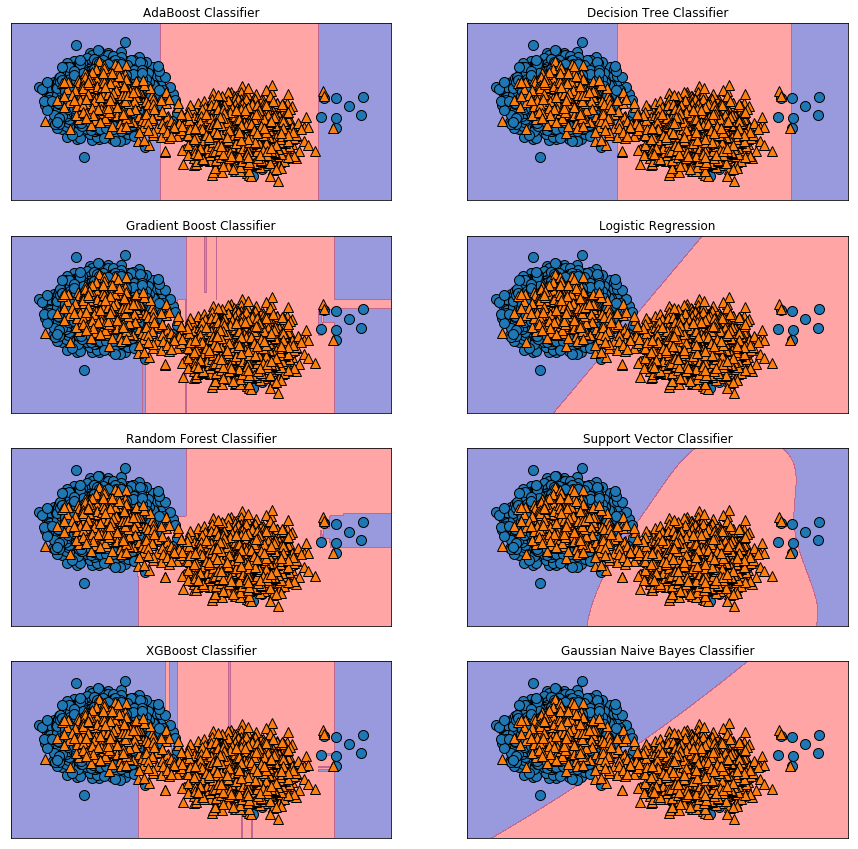

In [32]:
fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs[0, 0].set_title('AdaBoost Classifier')
axs[0, 1].set_title('Decision Tree Classifier')
axs[1, 0].set_title('Gradient Boost Classifier')
axs[1, 1].set_title('Logistic Regression')
axs[2, 0].set_title('Random Forest Classifier')
axs[2, 1].set_title('Support Vector Classifier')
axs[3, 0].set_title('XGBoost Classifier')
axs[3, 1].set_title('Gaussian Naive Bayes Classifier')

abc = AdaBoostClassifier(n_estimators = 5)
abc.fit(X_train, y_train)
print('Score for AdaBoost Classifier is:',abc.score(X_test,y_test))
mglearn.plots.plot_2d_separator(abc,X_train,fill=True,alpha=.4,ax=axs[0, 0])
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=axs[0, 0])

dtc = DecisionTreeClassifier(max_depth=2, random_state=0)
dtc.fit(X_train, y_train)
print('Score for Decision Tree Classifier is:',dtc.score(X_test,y_test))
mglearn.plots.plot_2d_separator(dtc,X_train,fill=True,alpha=.4,ax=axs[0, 1])
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=axs[0, 1])

gbc = GradientBoostingClassifier(n_estimators=40, max_depth=3)
gbc.fit(X_train,y_train)
print('Score for Gradient Boost Classifier is:',gbc.score(X_test,y_test))
mglearn.plots.plot_2d_separator(gbc,X_train,fill=True,alpha=.4,ax=axs[1, 0])
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=axs[1, 0])

lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)
print('Score for Logistic Regression is:',lr.score(X_test,y_test))
mglearn.plots.plot_2d_separator(lr,X_train,fill=True,alpha=.4,ax=axs[1, 1])
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=axs[1, 1])

rfc = RandomForestClassifier(max_depth=4, random_state=0, n_estimators=11)
rfc.fit(X_train, y_train)
print('Score for Random Forest Classifier is:',rfc.score(X_test,y_test))
mglearn.plots.plot_2d_separator(rfc,X_train,fill=True,alpha=.4,ax=axs[2, 0])
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=axs[2, 0])

svc = SVC(C=0.58, kernel='rbf',probability=True)
svc.fit(X_train, y_train)
print('Score for Support Vector Classifier is:',svc.score(X_test,y_test))
mglearn.plots.plot_2d_separator(svc,X_train,fill=True,alpha=.4,ax=axs[2, 1])
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=axs[2, 1])

params = {'objective':'binary:logistic', 'eta':1, 'max_depth':6, 'n_estimators':4}
xgboost = xgb.XGBClassifier(**params)
xgboost.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False)
evals_result = xgboost.evals_result()
print('Score for XGBoost Classifier is:',1-evals_result['validation_0']['error'][np.asarray(evals_result['validation_0']['error']).argmin()])
mglearn.plots.plot_2d_separator(xgboost,X_train,fill=True,alpha=.4,ax=axs[3, 0])
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=axs[3, 0])

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Score for Gaussian Naive Bayes is:',gnb.score(X_test,y_test))
mglearn.plots.plot_2d_separator(gnb,X_train,fill=True,alpha=.4,ax=axs[3, 1])
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=axs[3, 1])

In [8]:
scores = {}
scores['AdaBoost Classifier'] = abc.score(X_test,y_test)
scores['Decision Tree Classifier'] = dtc.score(X_test,y_test)
scores['Gradient Boost Classifier'] = gbc.score(X_test,y_test)
scores['Logistic Regression'] = lr.score(X_test,y_test)
scores['Random Forest Classifier'] = rfc.score(X_test,y_test)
scores['Support Vector Classifier'] = svc.score(X_test,y_test)
scores['XGBoost Classifier'] = xgboost.score(X_test,y_test)
scores['Gaussian Naive Bayes'] = gnb.score(X_test,y_test)
max_score = max(scores.values())
max_keys = [k for k, v in scores.items() if v == max_score]
print("Classifiers",max_keys,"have a score of",max_score)
print(sorted(scores.items(), key=lambda x: x[1], reverse=True))

Classifiers ['AdaBoost Classifier', 'Decision Tree Classifier', 'Logistic Regression'] have a score of 0.9542310821806347
[('AdaBoost Classifier', 0.9542310821806347), ('Decision Tree Classifier', 0.9542310821806347), ('Logistic Regression', 0.9542310821806347), ('Gaussian Naive Bayes', 0.9538242473555736), ('Support Vector Classifier', 0.9536208299430431), ('Gradient Boost Classifier', 0.9532139951179821), ('Random Forest Classifier', 0.9532139951179821), ('XGBoost Classifier', 0.9532139951179821)]


In [1]:
from scikitplot.metrics import plot_roc_curve

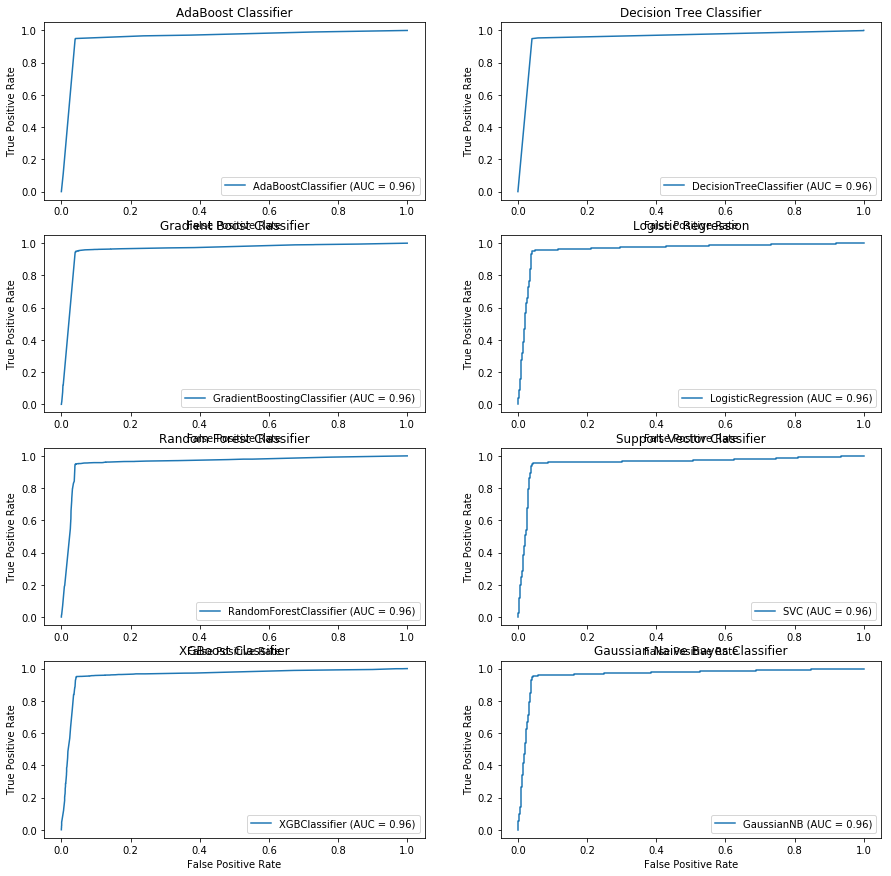

In [11]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs[0, 0].set_title('AdaBoost Classifier')
axs[0, 1].set_title('Decision Tree Classifier')
axs[1, 0].set_title('Gradient Boost Classifier')
axs[1, 1].set_title('Logistic Regression')
axs[2, 0].set_title('Random Forest Classifier')
axs[2, 1].set_title('Support Vector Classifier')
axs[3, 0].set_title('XGBoost Classifier')
axs[3, 1].set_title('Gaussian Naive Bayes Classifier')

plot_roc_curve(abc, X_test, y_test, ax=axs[0, 0])
plot_roc_curve(dtc, X_test, y_test, ax=axs[0, 1])
plot_roc_curve(gbc, X_test, y_test, ax=axs[1, 0])
plot_roc_curve(lr, X_test, y_test, ax=axs[1, 1])
plot_roc_curve(rfc, X_test, y_test, ax=axs[2, 0])
plot_roc_curve(svc, X_test, y_test, ax=axs[2, 1])
plot_roc_curve(xgboost, X_test, y_test, ax=axs[3, 0])
plot_roc_curve(gnb, X_test, y_test, ax=axs[3, 1])


In [12]:
roc = {}
roc['AdaBoost Classifier'] = roc_auc_score(y_test,abc.decision_function(X_test))
roc['Decision Tree Classifier'] = roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1])
roc['Gradient Boost Classifier'] = roc_auc_score(y_test,gbc.decision_function(X_test))
roc['Logistic Regression'] = roc_auc_score(y_test,lr.decision_function(X_test))
roc['Random Forest Classifier'] = roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
roc['Support Vector Classifier'] = roc_auc_score(y_test,svc.decision_function(X_test))
roc['XGBoost Classifier'] = roc_auc_score(y_test,xgboost.predict_proba(X_test)[:,1])
roc['Gaussian Naive Bayes'] = roc_auc_score(y_test,gnb.predict_proba(X_test)[:,1])
max_roc = max(roc.values())
max_keys = [k for k, v in roc.items() if v == max_roc]
print("Classifiers",max_keys,"have a ROC of",max_roc)
print(sorted(roc.items(), key=lambda x: x[1], reverse=True))


Classifiers ['Logistic Regression'] have a ROC of 0.9612140857063214
[('Logistic Regression', 0.9612140857063214), ('Gaussian Naive Bayes', 0.9605359078379947), ('Gradient Boost Classifier', 0.9597625500149969), ('XGBoost Classifier', 0.958772430190883), ('AdaBoost Classifier', 0.9581524362426728), ('Random Forest Classifier', 0.9578705380464901), ('Decision Tree Classifier', 0.9555886193245434), ('Support Vector Classifier', 0.9554569399263853)]


In [13]:
from sklearn.metrics import f1_score

f1 = {}
f1['AdaBoost Classifier'] = f1_score(y_test,abc.predict(X_test))
f1['Decision Tree Classifier'] = f1_score(y_test,dtc.predict(X_test))
f1['Gradient Boost Classifier'] = f1_score(y_test,gbc.predict(X_test))
f1['Logistic Regression'] = f1_score(y_test,lr.predict(X_test))
f1['Random Forest Classifier'] = f1_score(y_test,rfc.predict(X_test))
f1['Support Vector Classifier'] = f1_score(y_test,svc.predict(X_test))
f1['XGBoost Classifier'] = f1_score(y_test,xgboost.predict(X_test))
f1['Gaussian Naive Bayes'] = f1_score(y_test,gnb.predict(X_test))
max_f1 = max(f1.values())
max_keys = [k for k, v in f1.items() if v == max_f1]
print("Classifiers",max_keys,"have a f1 of",max_f1)
print(sorted(f1.items(), key=lambda x: x[1], reverse=True))


Classifiers ['Decision Tree Classifier'] have a f1 of 0.9544257646343934
[('Decision Tree Classifier', 0.9544257646343934), ('AdaBoost Classifier', 0.9544072948328268), ('Logistic Regression', 0.9544072948328268), ('Gaussian Naive Bayes', 0.9539833772552199), ('Support Vector Classifier', 0.953771289537713), ('XGBoost Classifier', 0.9534789644012945), ('Gradient Boost Classifier', 0.9534412955465588), ('Random Forest Classifier', 0.9534412955465588)]


In [15]:
from joblib import dump

dump(abc,'models/AdaBoost Classifier.joblib')
dump(dtc,'models/Decision Tree Classifier.joblib')
dump(gbc,'models/Gradient Boost Classifier.joblib')
dump(lr,'models/Logistic Regression.joblib')
dump(rfc,'models/Random Forest Classifier.joblib')
dump(svc,'models/Support Vector Classifier.joblib')
dump(xgboost,'models/XGBoost Classifier.joblib')
dump(gnb,'models/Gaussian Naive Bayes.joblib')

['models/Gaussian Naive Bayes.joblib']

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [33]:
eclf1 = VotingClassifier(estimators=[('abc', abc), ('rf', dtc), ('gbc', gbc),('lr',lr),('rfc',rfc),('svc',svc),('xgboost',xgboost),('gnb',gnb)], voting='hard')

In [34]:
eclf1 = eclf1.fit(X_train, y_train)

In [35]:
eclf_final=eclf1.predict(X_test)

In [36]:
eclf1.score(X_test,y_test)

0.9540276647681042

In [37]:
from sklearn.metrics import f1_score
f1_score(y_test,eclf1.predict(X_test))

0.9542139384116693

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,eclf1.predict(X_test))

0.95407492698456

In [62]:
probas = [c.fit(X_train, y_train).predict_proba(X_test) for c in (abc, dtc, gbc, lr,rfc,svc,xgboost,gnb)]

In [63]:
eclf1 = VotingClassifier(estimators=[('abc', abc), ('rf', dtc), ('gbc', gbc),('lr',lr),('rfc',rfc),('svc',svc),('xgboost',xgboost),('gnb',gnb)], voting='soft')
eclf1 = eclf1.fit(X_train, y_train)
eclf_final=eclf1.predict(X_test)
eclf1.score(X_test,y_test)


0.9540276647681042

In [64]:
f1_score(y_test,eclf1.predict(X_test))

0.9542324827865533

In [65]:
roc_auc_score(y_test,eclf1.predict(X_test))

0.95407492698456

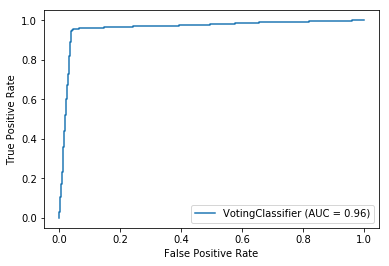

In [66]:
plot_roc_curve(eclf1, X_test, y_test)